In [10]:
import numpy as np
import xarray as xr

In [2]:
import os
import fnmatch

In [3]:
path = '/home/amal/path/'

### CTCZ

In [11]:
def gen_find_files_ct(filepatt, top):
    '''
    Find all filenames in a directory tree that match a shell wildcard pattern
    '''
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)

def gen_opener_ct(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            fc = xr.open_dataset(filename)                     # !! dataset and data array careful
            precip = np.flip(fc.precipitationCal.transpose(), axis=0)
            mean_ct = np.mean(precip[:,:,0].sel(lat=slice(25, 15), lon=slice(75, 85)).values)
            #mean_ct = np.mean(fc.precipitationCal[0,:,:].where(mask, drop=True).values)
        yield mean_ct


'#what do you want to do with the chained files? concatenate each element into numpy array.\n\ndef list_mean_ct(iter_sq):\n    cz_l = [i for i in iter_sq]    \n    return cz_l\n'

In [12]:
ct = gen_find_files_ct('*.nc4', path21)

In [13]:
cz = gen_opener_ct(ct)

In [14]:
ctcz_mean = np.array(list(cz))

In [15]:
np.mean(ctcz_mean)

7.7689505

In [22]:
#mean for each year

ctcz = np.array([7.2871447, 6.9551497, 6.3826294, 8.024538, 7.139179, 8.673258, 8.354882, 8.591435, 7.961072, 6.9573216, 8.546199, 8.250655, 8.200523, 8.942336, 6.8241377, 7.6388674, 8.549162, 7.0945683, 6.890301, 8.51846, 8.276254, 7.7689505])

In [8]:
len(ctcz)

22

In [74]:
len(ctcz)

22

### 7. NINO3.4

In [16]:
def gen_find_files(filepatt, top):
    '''
    Find all filenames in a directory tree that match a shell wildcard pattern
    '''
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist, filepatt):
            yield os.path.join(path, name)
            
            
def gen_opener_nino(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            pptn = f.precipitationCal[0,:,:].sel(lat=slice(-5, 5), lon=slice(-170, -120))
            area = np.flip(pptn.transpose(), axis=0)
            mean = np.mean(area.values)
        yield mean

            
        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_nino(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [17]:
nino = gen_find_files('*.nc4', path21)

In [18]:
nino_o = gen_opener_nino(nino)

In [19]:
nino_mean = np.array(list_mean_nino(nino_o))

In [20]:
np.mean(nino_mean)

0.65227866

In [23]:
nino = np.array([0.78603846, 0.96707565, 1.9397724, 0.6491788, 1.1310894, 1.1369839, 1.1851085, 0.58902943, 1.0805206, 1.8587512, 0.34067497, 1.1755369, 1.7347848, 0.5450486, 1.3505951, 4.3490596, 0.39365634, 0.89861125, 0.8322839, 1.0137532, 0.3923789, 0.65227866])
len(nino)

22

### 1. West Pacific (WPAC)

1

In [6]:



def gen_opener_wpac(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(120, 140), lat=slice(-7.5, 7.5)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_wpac(iter_sq):
    lm = [i for i in iter_sq]    
    return lm



In [334]:
import os

In [329]:
y = gen_find_files('*.nc4', path05)

In [330]:
d = gen_opener_wpac(y)

In [331]:
box_mean = np.array(list_mean_wpac(d))

In [332]:
np.mean(box_mean)

6.761966

In [88]:
wpac = np.array([7.726868, 6.6537623, 4.522855, 6.2885323, 5.073936, 6.761966, 6.644985, 7.7390327, 9.441322, 6.172746, 9.325601, 8.42498, 8.168545, 9.84539, 6.267886, 3.8018308, 7.232473, 9.623261, 5.7620897, 5.088123, 7.4974384, 7.814981])
len(wpac)

22

In [9]:
len(box_mean)

2561

### 2. East Arabian Sea (EAS)

In [336]:

def gen_opener_eas(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(60, 70), lat=slice(10, 23)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_eas(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [426]:
eas = gen_find_files('*.nc4', path21)

In [427]:
eas_o = gen_opener_eas(eas)

In [428]:
eas_mean = np.array(list_mean_eas(eas_o))

In [429]:
np.mean(eas_mean)

2.0943258

In [95]:
eas = np.array([2.6852207, 1.4421486, 1.8936199, 2.370041, 2.954852, 2.8829143, 3.01586, 4.903637, 2.3485148, 2.7778356, 4.33074, 2.4526637, 1.4777428, 2.8433745, 2.9556925, 2.8191032, 1.803267, 2.438277, 1.0703508, 3.8835993, 4.4630194, 2.0943258])

In [431]:
len(eas)

22

### 3. BoB

In [15]:

def gen_opener_bob(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(80, 90), lat=slice(2.5, 15)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_bob(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [516]:
bob = gen_find_files('*.nc4', path21)

In [517]:
bob_o = gen_opener_bob(bob)

In [518]:
bob_mean = np.array(list_mean_bob(bob_o))

In [519]:
np.mean(bob_mean)

5.0653887

In [96]:
bob = np.array([5.978894, 4.4477935, 3.7819045, 5.357401, 5.5305986, 5.3511453, 4.9981103, 6.9248233, 5.9940553, 4.8277445, 8.299957, 6.172189, 5.173124, 6.6810584, 4.889497, 5.855502, 4.6981363, 4.858047, 3.9556928, 6.098852, 7.110754, 5.0653887])

In [521]:
len(bob)

22

### 4. EIO

In [150]:

def gen_opener_eio(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(80, 100), lat=slice(-10, 0)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_eio(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [152]:
eio = gen_find_files('*.nc4', path21)

In [611]:
eio_o = gen_opener_eio(eio)

In [608]:
eio_mean = np.array(list_mean_eio(eio_o))

In [609]:
np.mean(eio_mean)

9.970112

In [97]:
eio = np.array([10.03694, 9.208104, 8.029721, 7.4769254, 10.454843, 10.248733, 6.508436, 8.71551, 7.3137474, 9.837057, 11.354897, 7.4773073, 5.7077928, 9.269785, 8.804045, 6.321134, 10.476678, 10.263646, 6.769303, 3.9720902, 9.44557, 9.970112])

In [616]:
len(eio)

22

### 5. WEIO

In [77]:

def gen_opener_weio(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(50, 70), lat=slice(-10, 10)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_weio(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [82]:
weio = gen_find_files('*.nc4', path19)

In [83]:
weio_o = gen_opener_weio(weio)

In [84]:
weio_mean = np.array(list_mean_weio(weio_o))

In [85]:
np.mean(weio_mean)

4.182421

In [98]:
weio = np.array([3.2308087, 2.831427, 3.291248, 5.1579776, 3.1310833,  2.9008074, 3.6281836, 4.106961, 4.3510003, 3.3342204, 3.1470442, 3.9381294, 4.670875, 3.2317777, 3.1984828, 4.1391935, 2.0559866, 2.8197634, 2.4867063, 4.182421, 4.0744777, 2.639097])

In [706]:
len(weio)  4.0744777

21

### 6. EqIO

In [707]:

def gen_opener_eqio(filenames):
    '''
    Open a sequence of filenames one at a time producing a file object.
    '''
    for filename in filenames:
        if filename.endswith('.nc4'):
            f = xr.open_dataset(filename)                     # !! dataset and data array careful
            mean = np.mean(f.precipitationCal[0,:,:].sel(lon=slice(70, 80), lat=slice(-5, 5)).values)
        yield mean

        '''
def gen_concatenate(iterators):
    '''
    #Chain a sequence of iterators together into a single sequence.
    '''
    for it in (iterators):
        yield from it  #from iterator obj
'''
        
#what do you want to do with the chained files?

def list_mean_eqio(iter_sq):
    lm = [i for i in iter_sq]    
    return lm


In [792]:
eqio = gen_find_files('*.nc4', path21)

In [793]:
eqio_o = gen_opener_eqio(eqio)

In [794]:
eqio_mean = np.array(list_mean_eqio(eqio_o))

In [795]:
np.mean(eqio_mean)

5.484892

In [99]:
eqio = np.array([7.1279964, 6.410822, 8.990618, 6.7885113, 7.035024, 7.0054307, 7.3423557, 7.701445, 6.336603, 6.78007, 7.543526, 7.2017803, 6.254389, 5.8627872, 5.8349185, 7.976637, 5.9471035, 5.779407, 5.7376513, 5.882294, 5.7113285, 5.484892])

In [797]:
len(eqio)

22

In [127]:
lat = sample.lat
lon = sample.lon

In [117]:
mas = sample.precipitationCal[0,:,:].where(mask).to_array()
mas = mas[0,:,:]

In [119]:
lat = mas.lat
lon = mas.lon

In [142]:
sample.lon[::-1]

<xarray.DataArray 'lon' (lon: 3600)>
array([ 179.95   ,  179.85002,  179.75002, ..., -179.75   , -179.84999,
       -179.95   ], dtype=float32)
Coordinates:
  * lon      (lon) float32 179.9 179.9 179.8 179.7 ... -179.8 -179.8 -179.9
Attributes:
    units:      degrees_east
    long_name:  Longitude

In [155]:
sample

<xarray.Dataset>
Dimensions:                    (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                        (lon) float32 -179.9 -179.8 ... 179.9 179.9
  * lat                        (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * time                       (time) object 2001-07-24 00:00:00
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int8 ...
    precipitationCal_cnt_cond  (time, lon, lat) int8 ...
    HQprecipitation            (time, lon, lat) float32 ...
    HQprecipitation_cnt        (time, lon, lat) int8 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int8 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int8 ...
    time_bnds                  (time, nv) object 2001-07-24 00:00:00 2001-07-...
Attributes:
    BeginDate:       2001-07-24
    BeginTime:       00:00:00.000Z
    EndDate:         2001-07-24
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2001-07-24T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20010724-S000000-E002959.0000.V06B....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/06
    ProductionTime:  2019-06-21T11:01:30.962Z

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

import cartopy.io.shapereader as shpreader
import cartopy.feature as cf
from cartopy import config
import matplotlib as mpl
#from mpl_toolkits.axes_grid1 import make_axes_locatable

In [168]:
X, Y = np.meshgrid(lon, lat)

In [214]:
precip = np.flip(sample.precipitationCal[0,:,:].transpose(), axis=0)

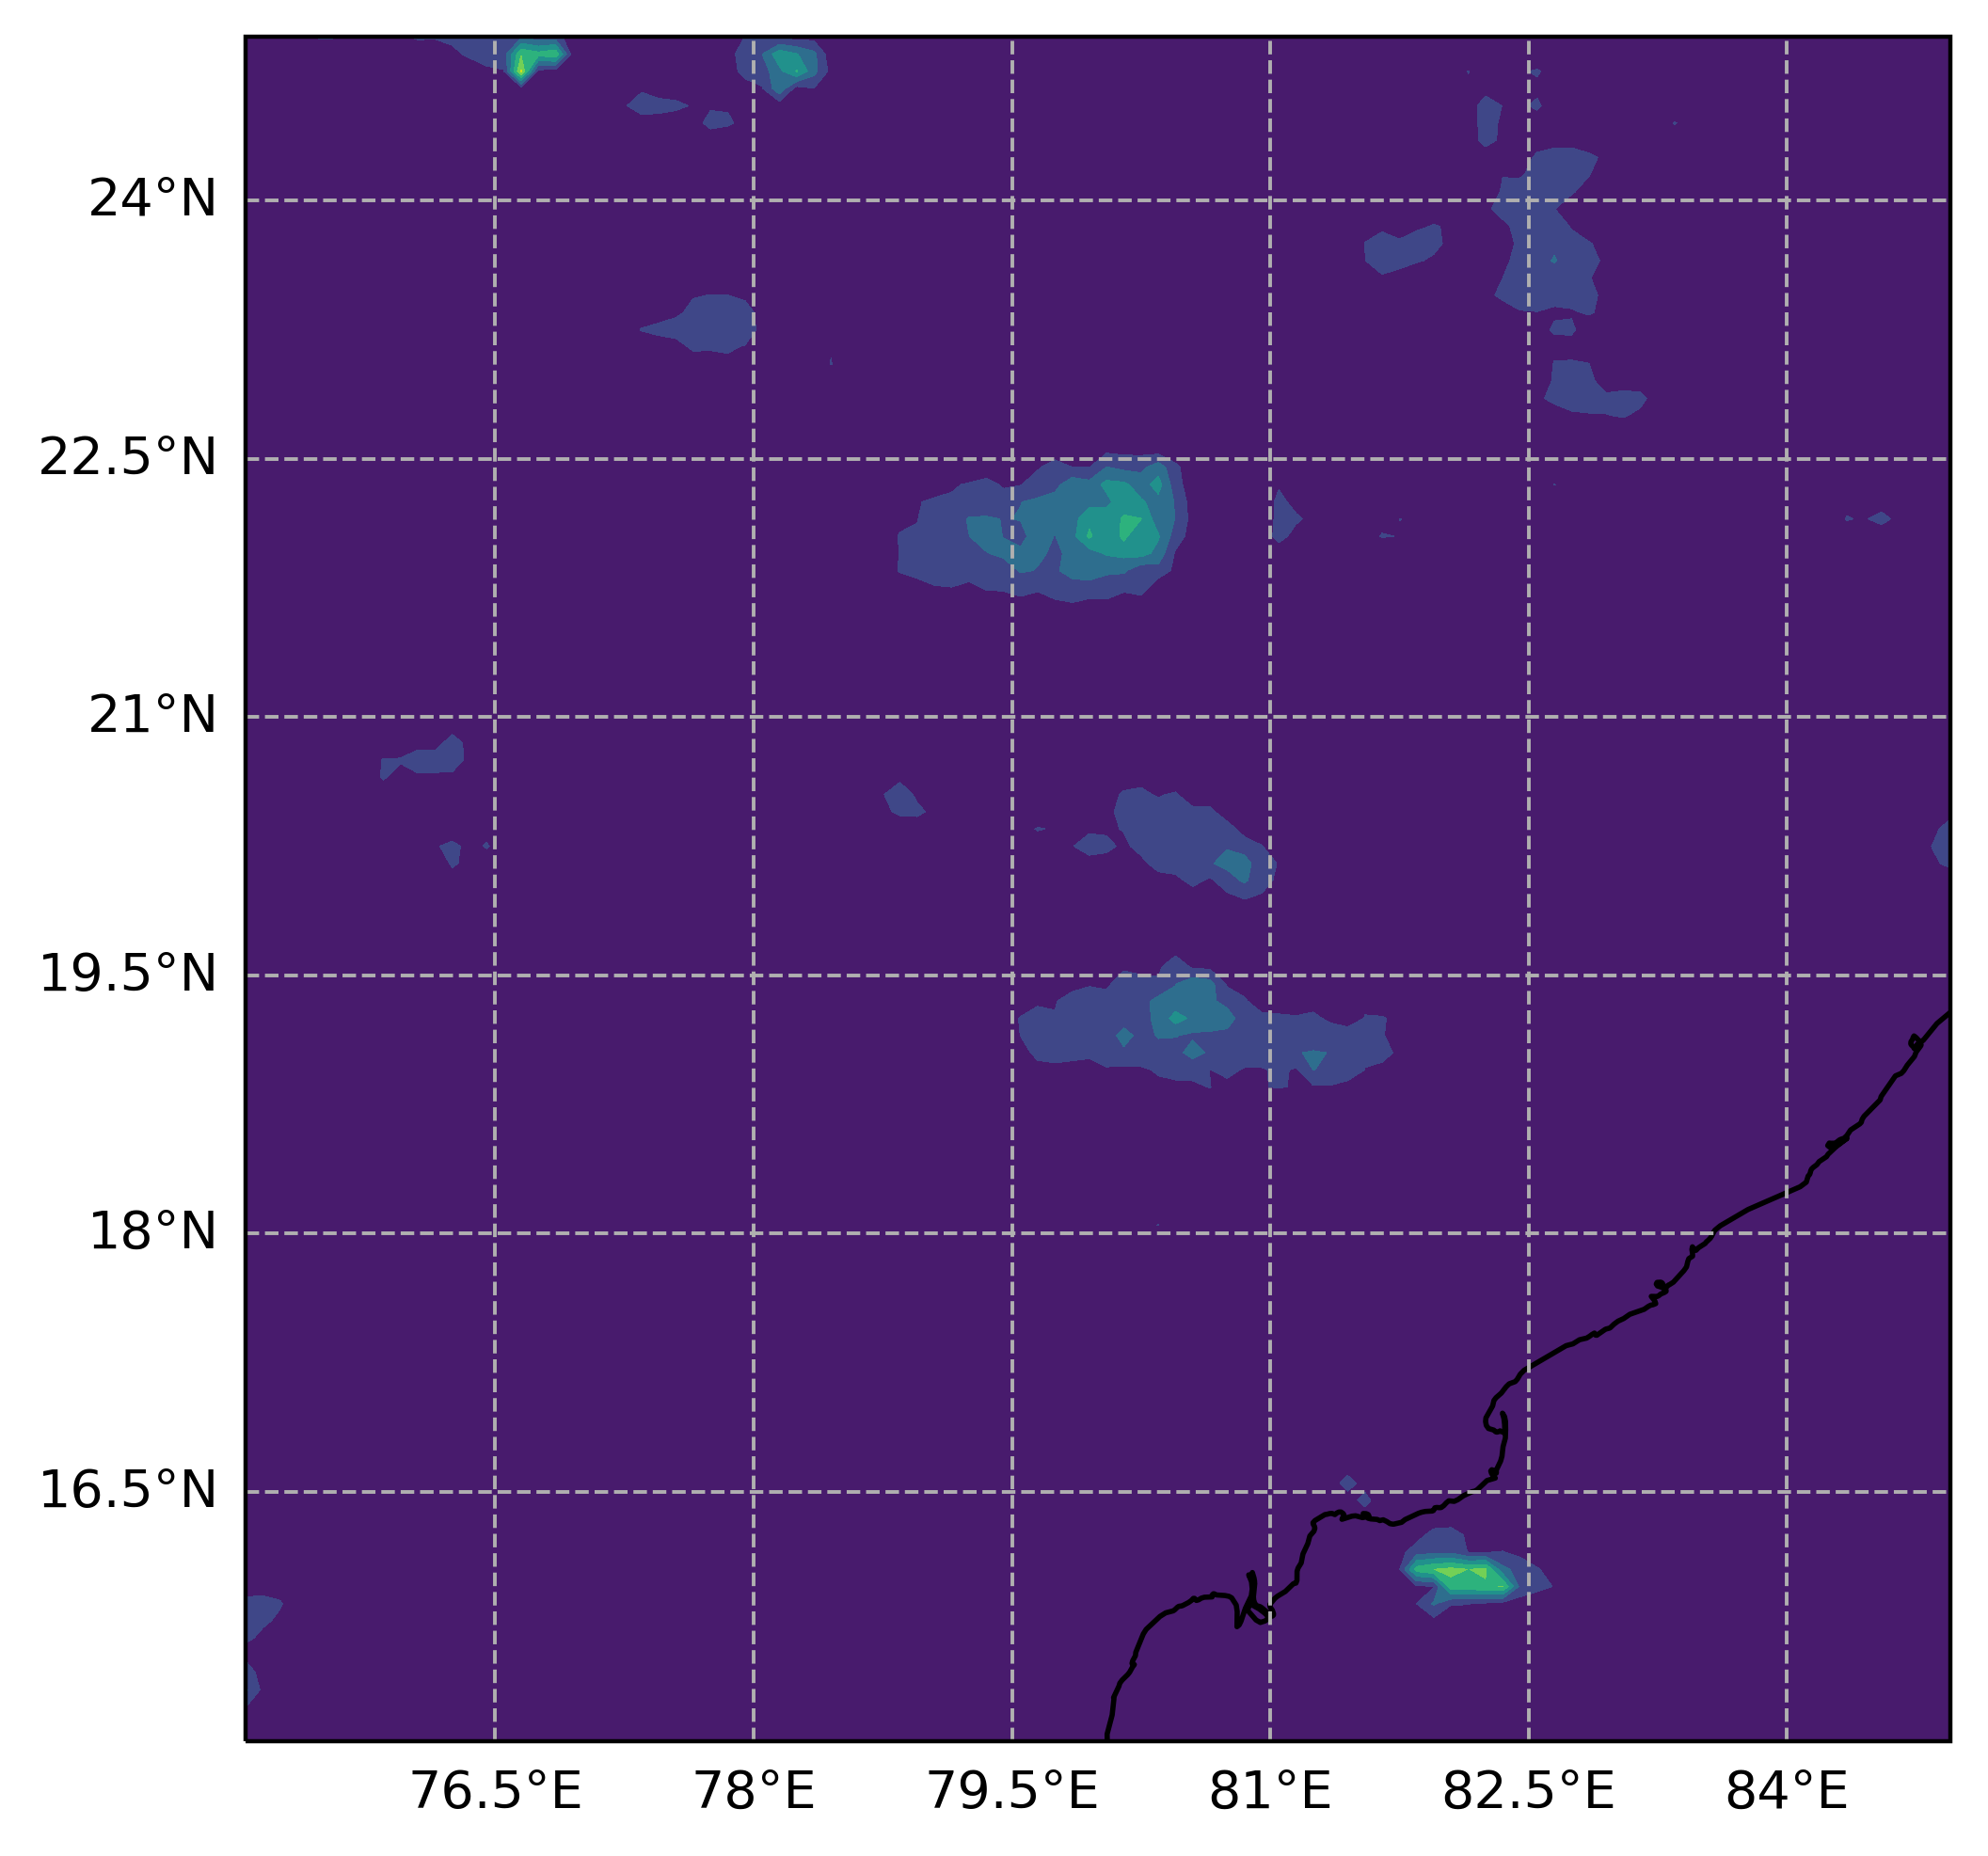

In [30]:
fig = plt.figure(dpi=400, figsize=(16,6))
ax = plt.axes(projection=ccrs.PlateCarree()) #central_longitude=80

ax.contourf(sel.lon, sel.lat, sel)



#gridlines
g = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.7)
g.top_labels = False
g.right_labels = False

#map features
#ax.add_feature(cartopy.feature.LAND) #, edgecolor='black'
#ax.add_feature(cf.BORDERS) #linewidth=0.5, edgecolor='grey'
ax.add_feature(cf.COASTLINE)

#plt.savefig('mean_jjas_83_wnd_200hpa.pdf', dpi=400, bbox_inches='tight')

In [20]:
np.mean(ctcz_mean)

8.424735

In [21]:
len(ctcz_mean)

2561

### scatter

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

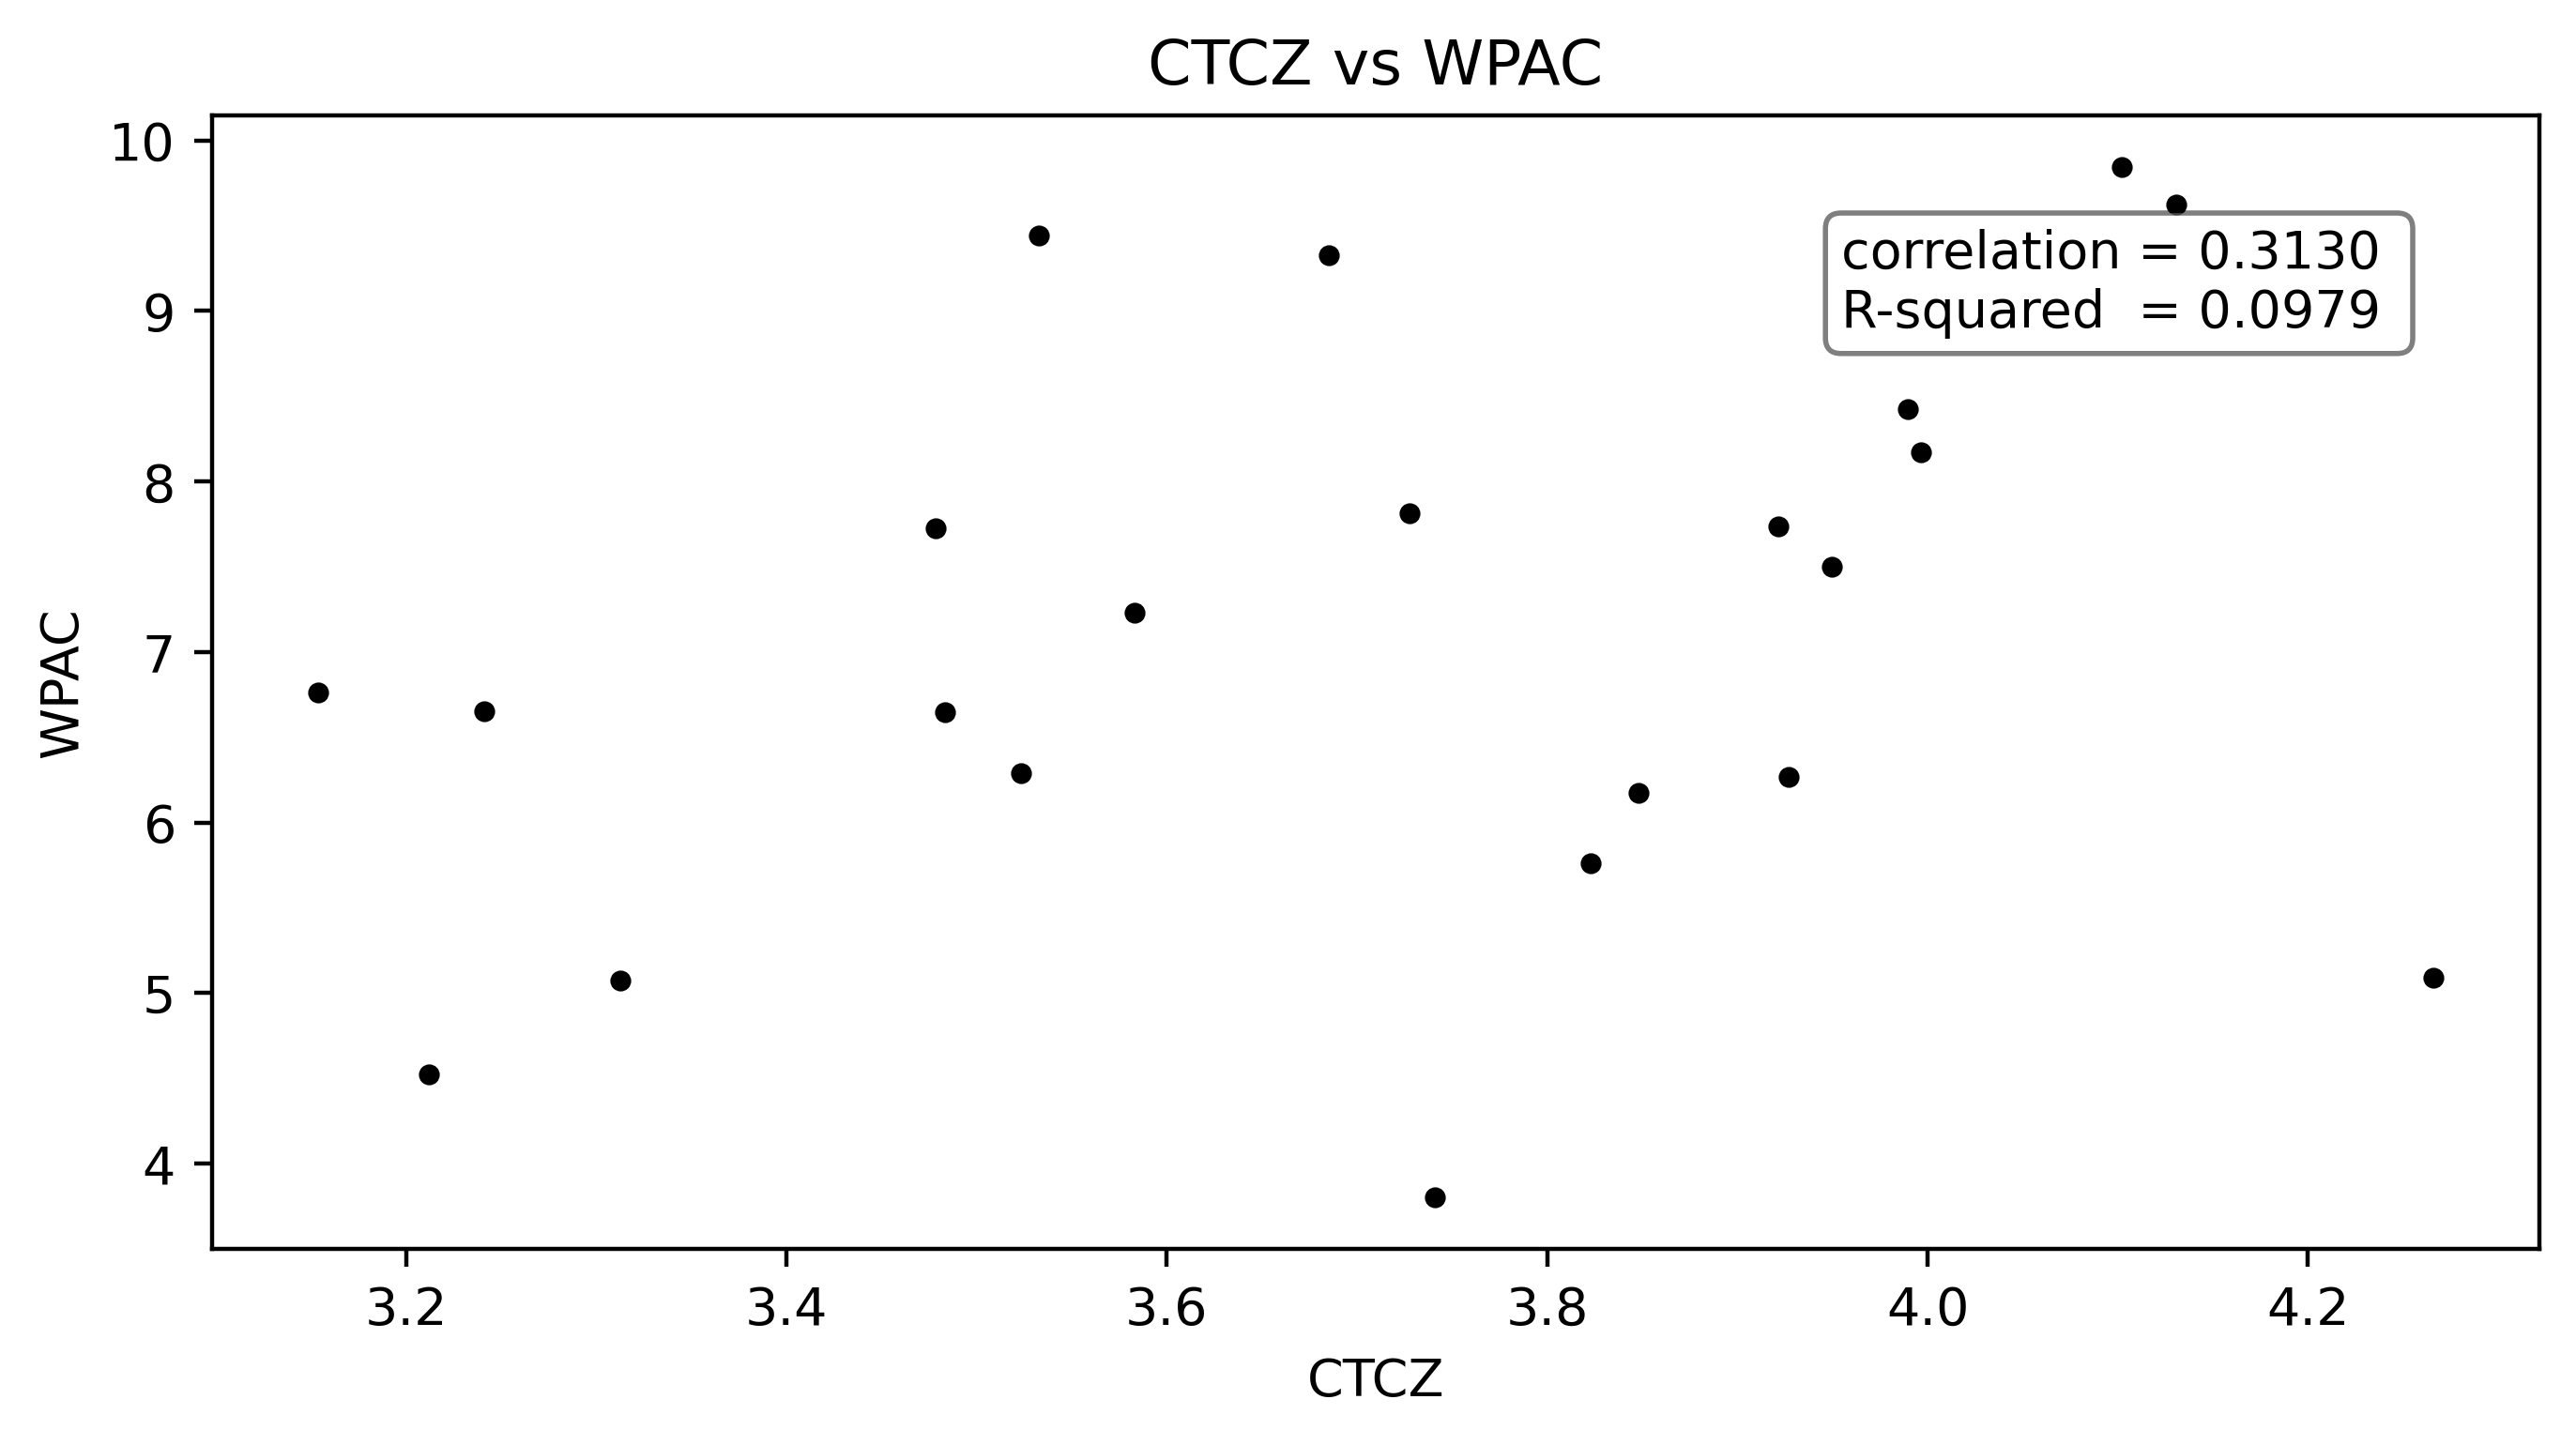

In [132]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs WPAC')
ax.plot(ctcz, wpac, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('WPAC')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = 0.3130 \nR-squared  = 0.0979', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;

plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [90]:
np.corrcoef(ctcz_mean, box_mean)

array([[1.        , 0.31300117],
       [0.31300117, 1.        ]])

In [92]:
np.corrcoef(ctcz, wpac)

array([[1.        , 0.31300117],
       [0.31300117, 1.        ]])

In [91]:
from scipy import stats

In [93]:
stats.pearsonr(ctcz, wpac)

(0.31300116614651974, 0.15609108026999371)

In [20]:
stats.pearsonr(ctcz, box_mean)

(0.09625030365960838, 1.0617788631531372e-06)

In [115]:
res = stats.linregress(ctcz, wpac)

In [116]:
res.rvalue**2

0.09796973000908132

#### ctcz vs eas

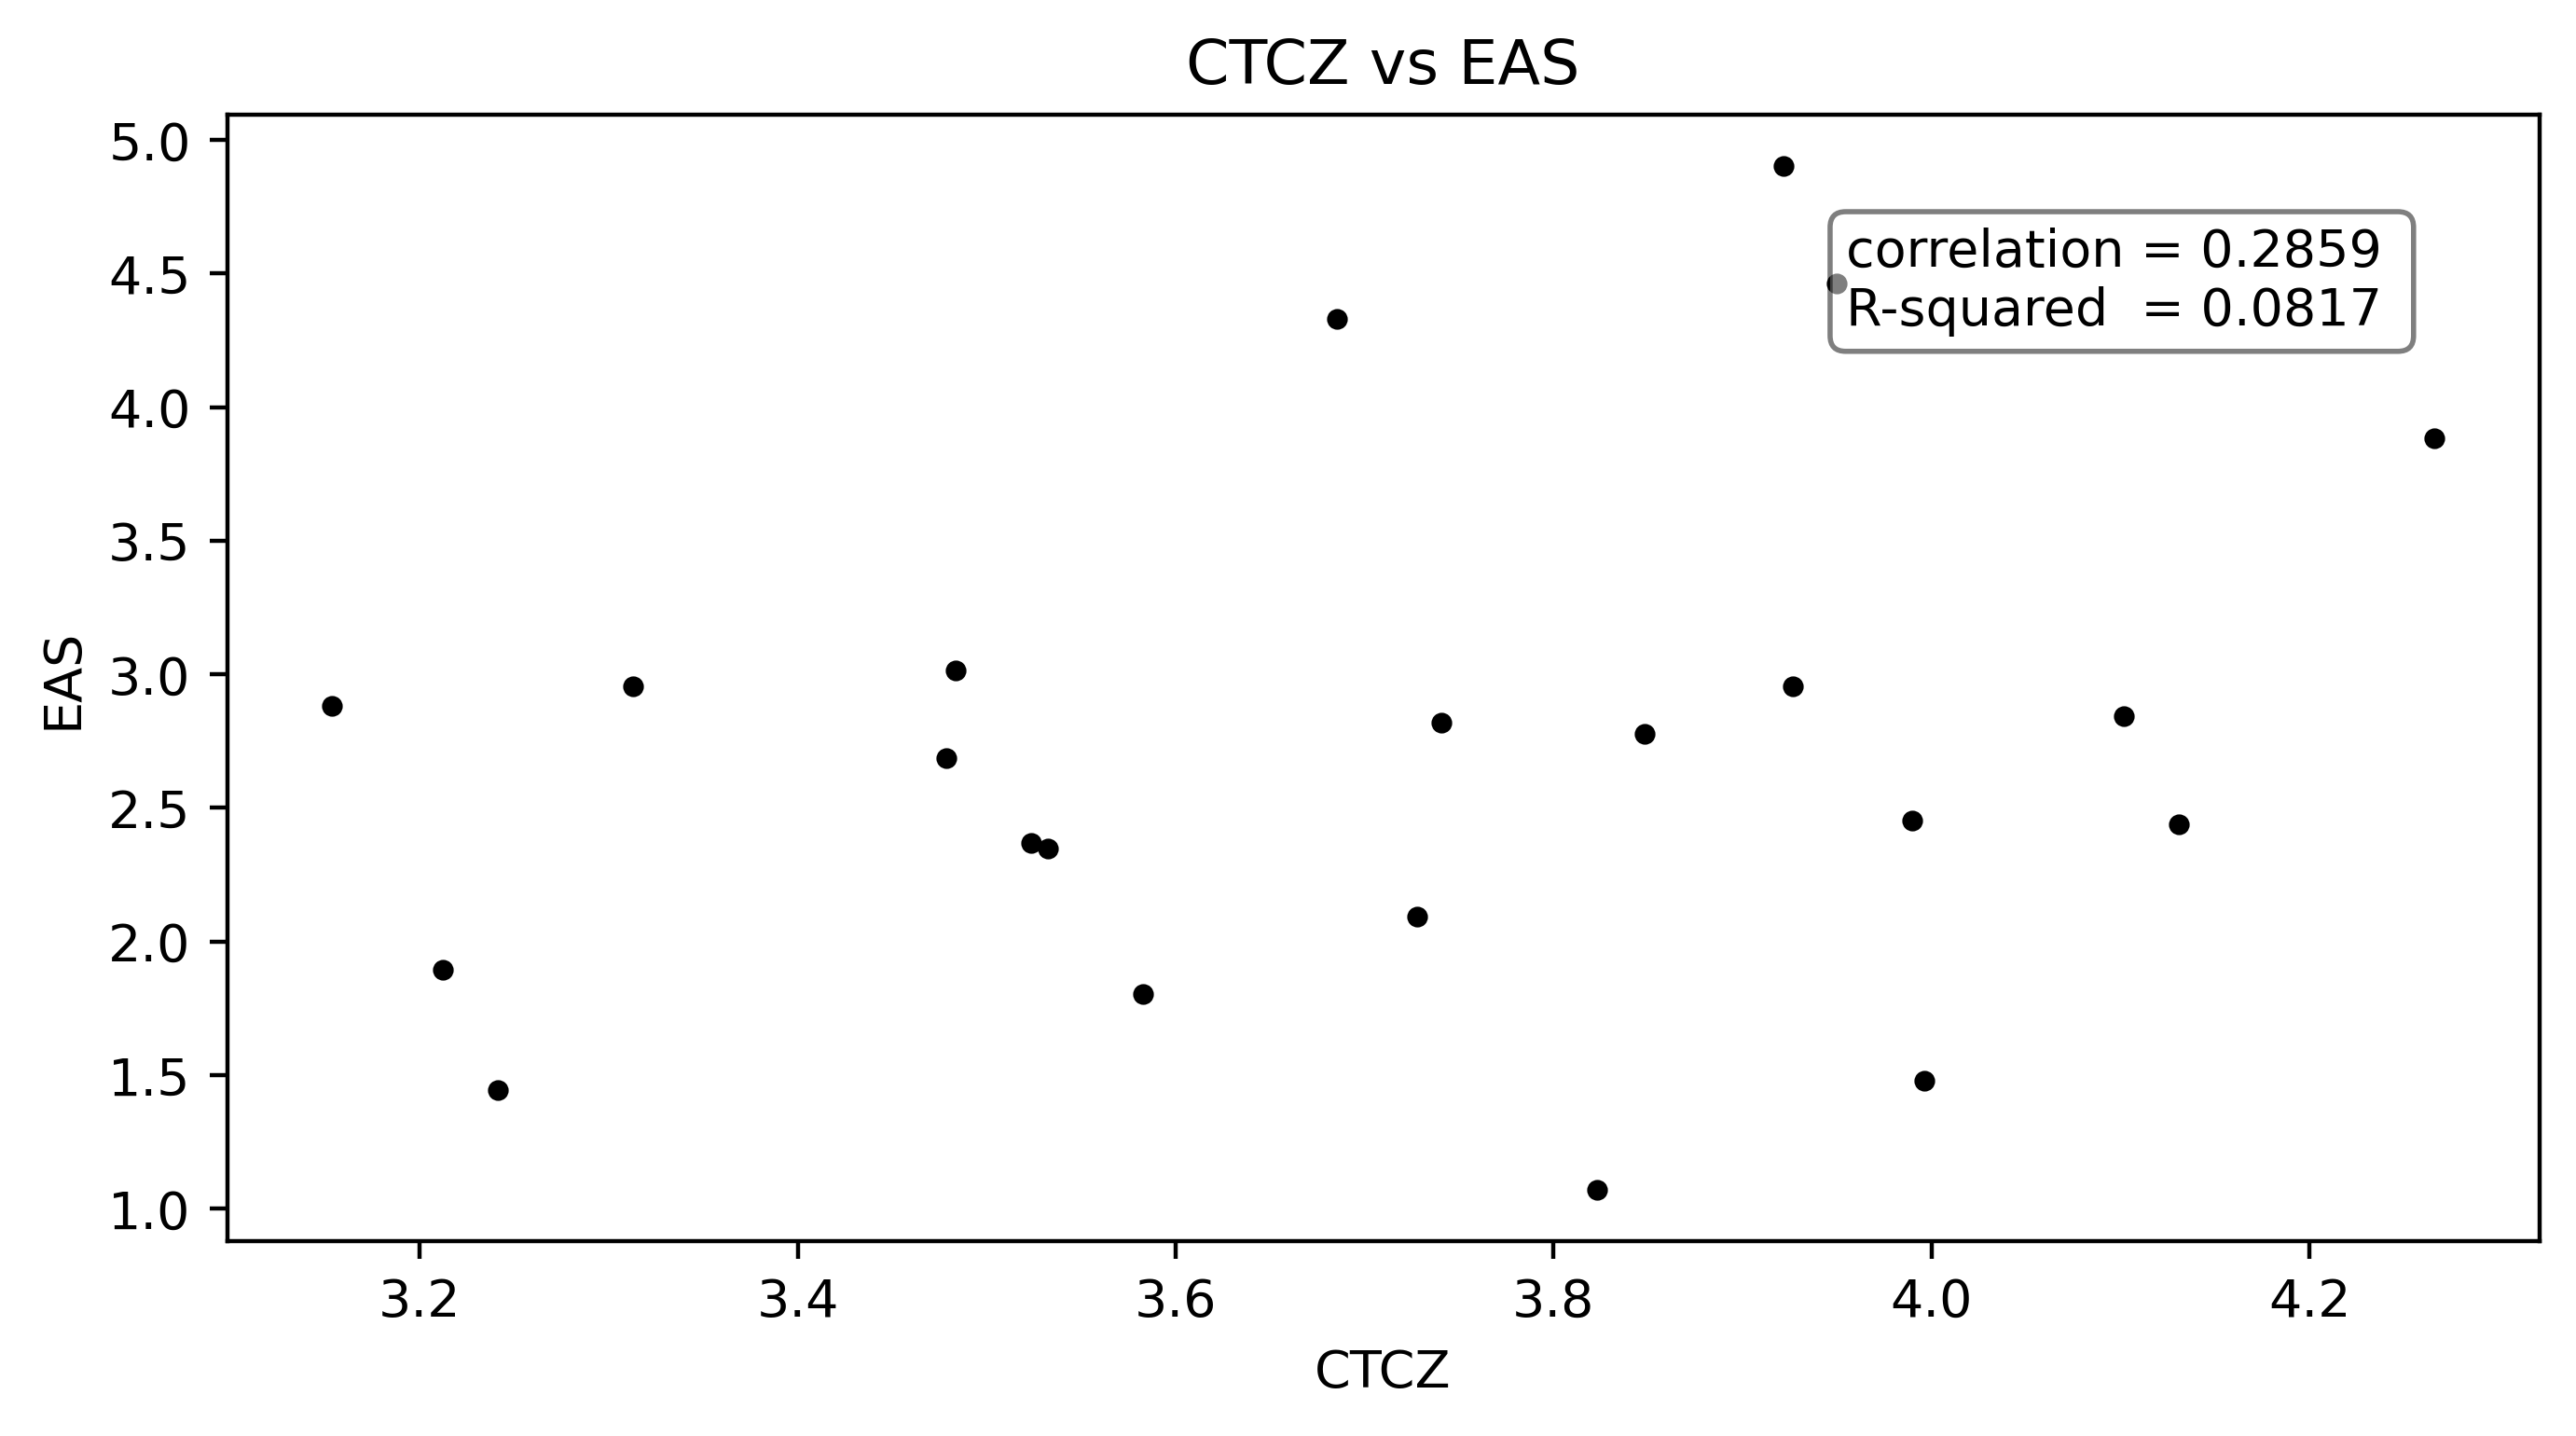

In [133]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs EAS')
ax.plot(ctcz, eas, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('EAS')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = 0.2859 \nR-squared  = 0.0817', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;
plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_eas.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [96]:
np.corrcoef(ctcz_mean, eas_mean)

array([[1.        , 0.06722832],
       [0.06722832, 1.        ]])

In [118]:
stats.pearsonr(ctcz, eas)

(0.28598356385207324, 0.19697055363068078)

In [119]:
res = stats.linregress(ctcz, eas)

In [120]:
res.rvalue**2

0.08178659879353285

#### BoB

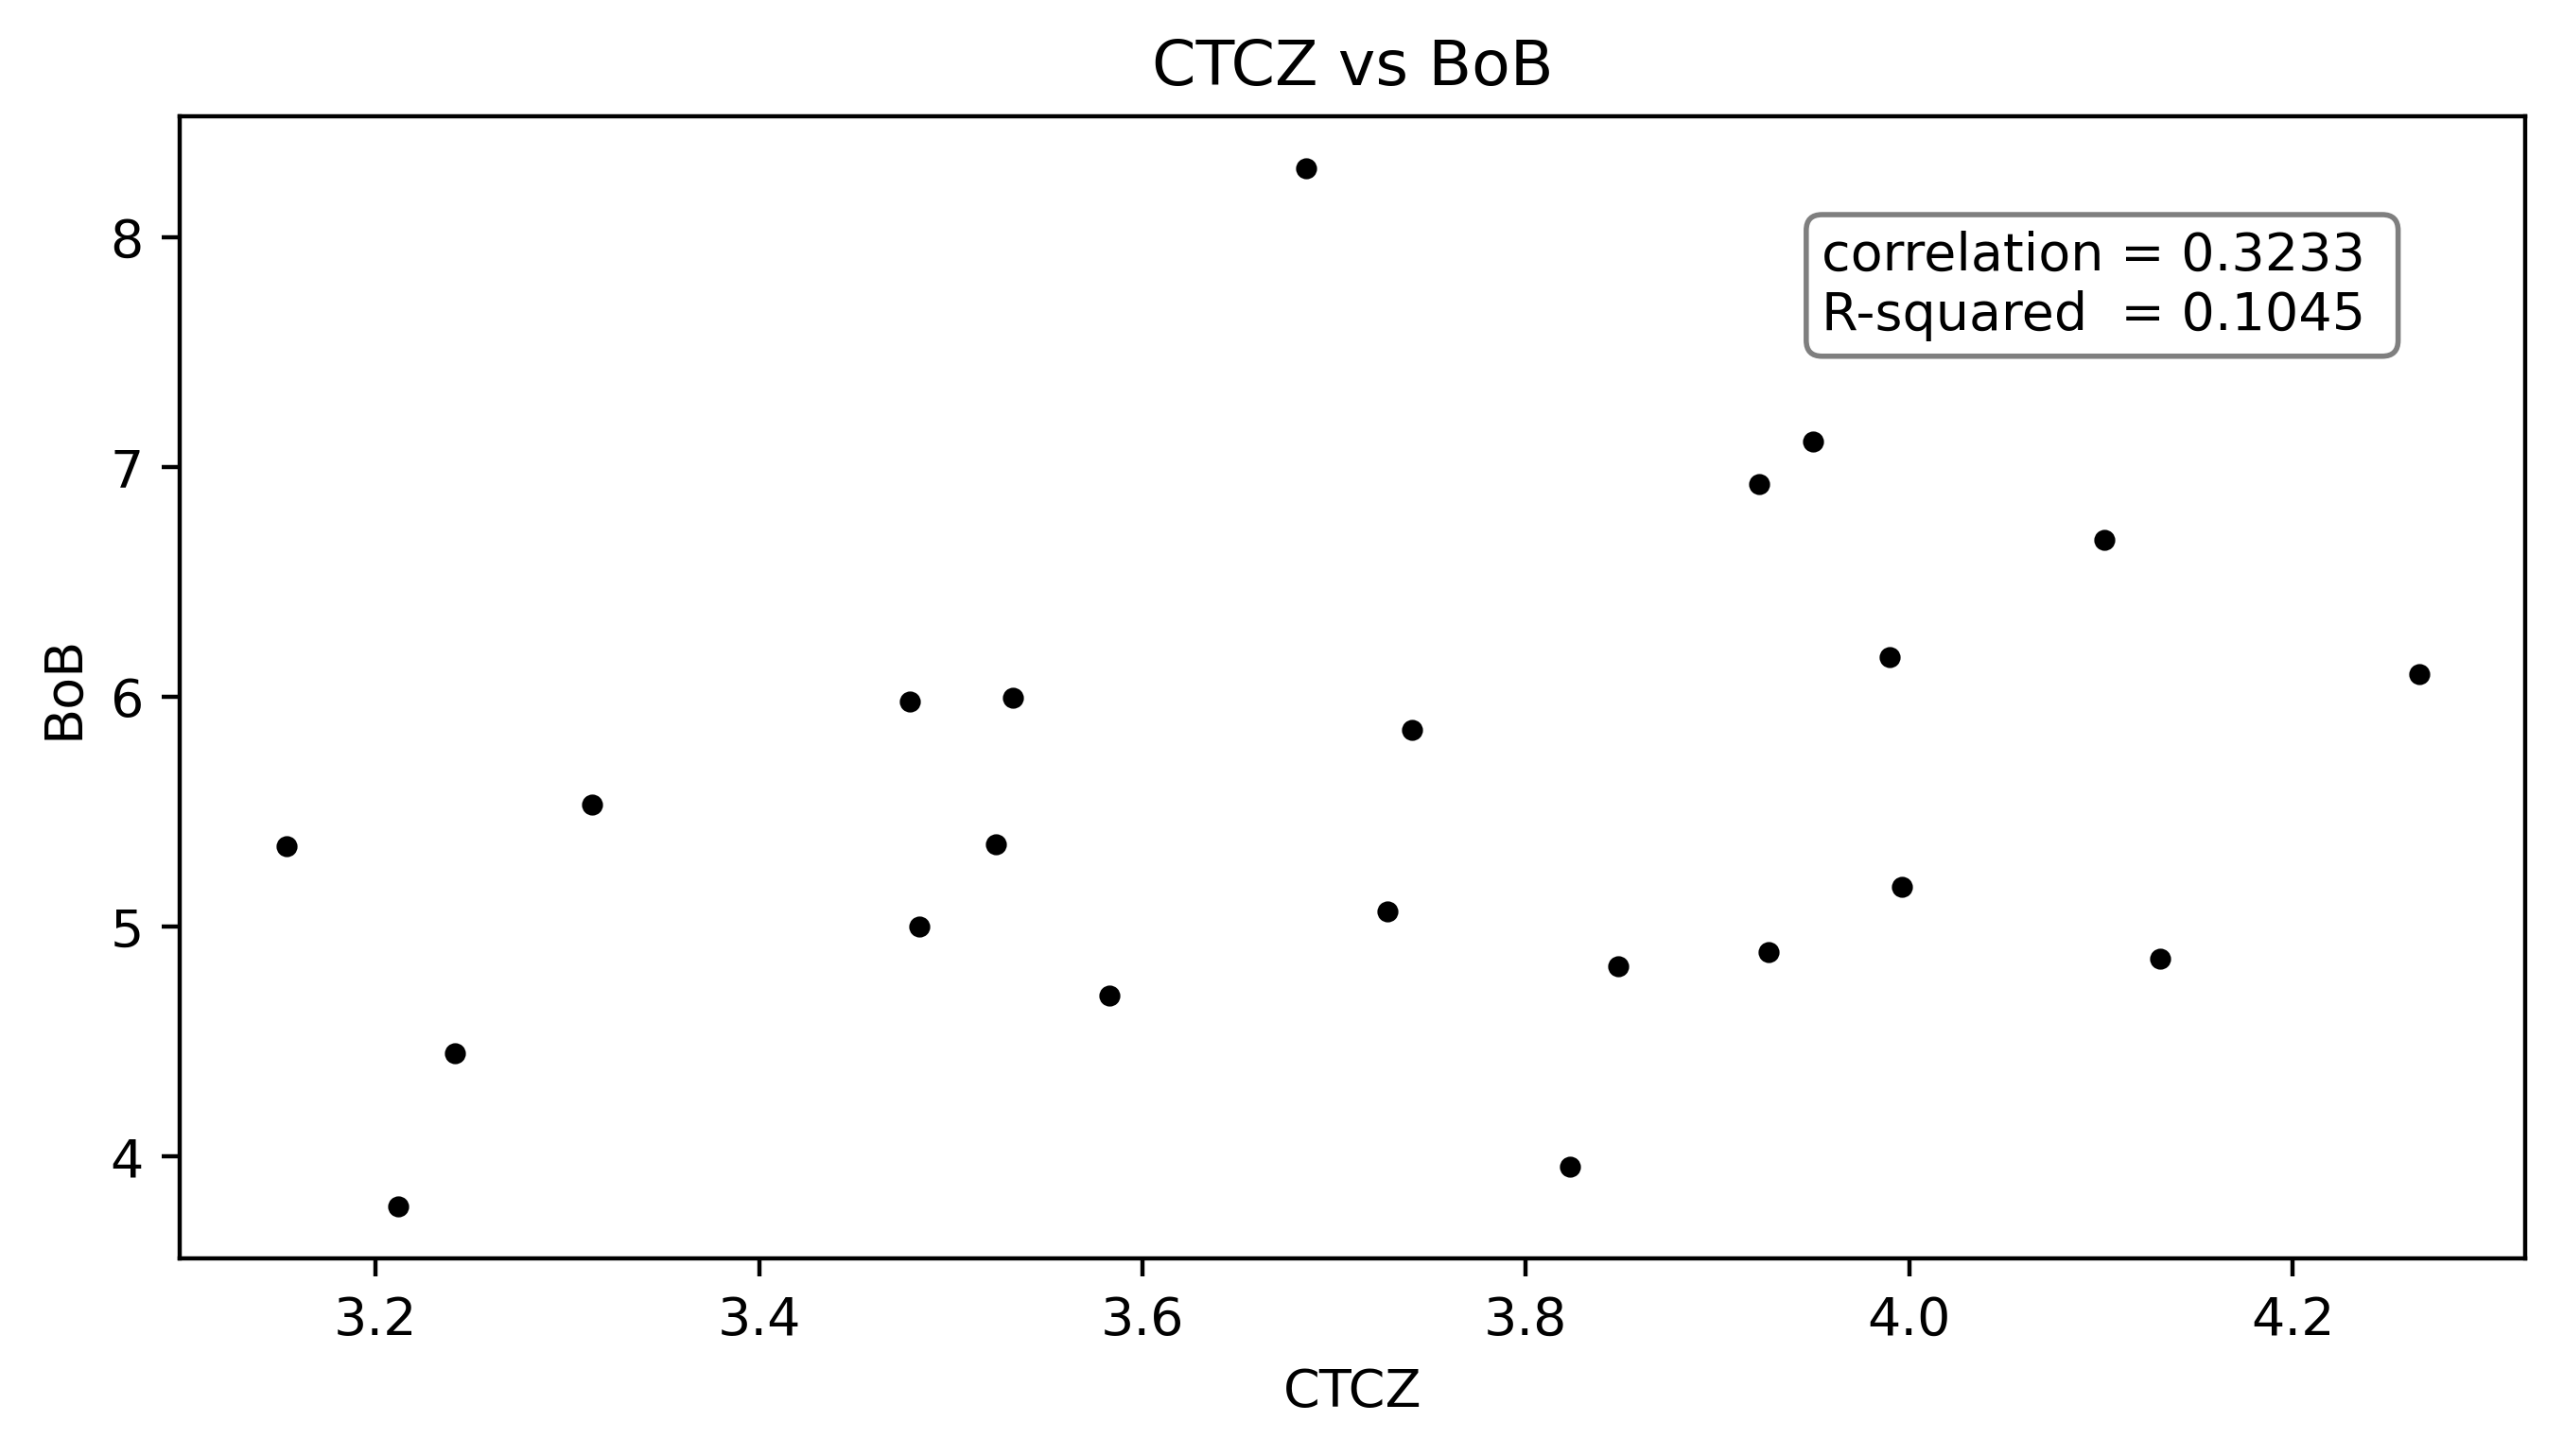

In [137]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs BoB')
ax.plot(ctcz, bob, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('BoB')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = 0.3233 \nR-squared  = 0.1045', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;
plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_bob.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [89]:
np.corrcoef(ctcz_mean, bob_mean)

array([[1.        , 0.00137554],
       [0.00137554, 1.        ]])

In [134]:
stats.pearsonr(ctcz, bob)

(0.323319354791418, 0.14217497345509897)

In [135]:
res = stats.linregress(ctcz, bob)

In [136]:
res.rvalue**2

0.10453540518273886

#### EIO

In [107]:
np.corrcoef(ctcz, eio)

array([[ 1.        , -0.31567818],
       [-0.31567818,  1.        ]])

In [138]:
stats.pearsonr(ctcz, eio)

(-0.315678181357002, 0.15239253301654304)

In [127]:
res = stats.linregress(ctcz, eio)

In [129]:
res.rvalue**2

0.09965271418486424

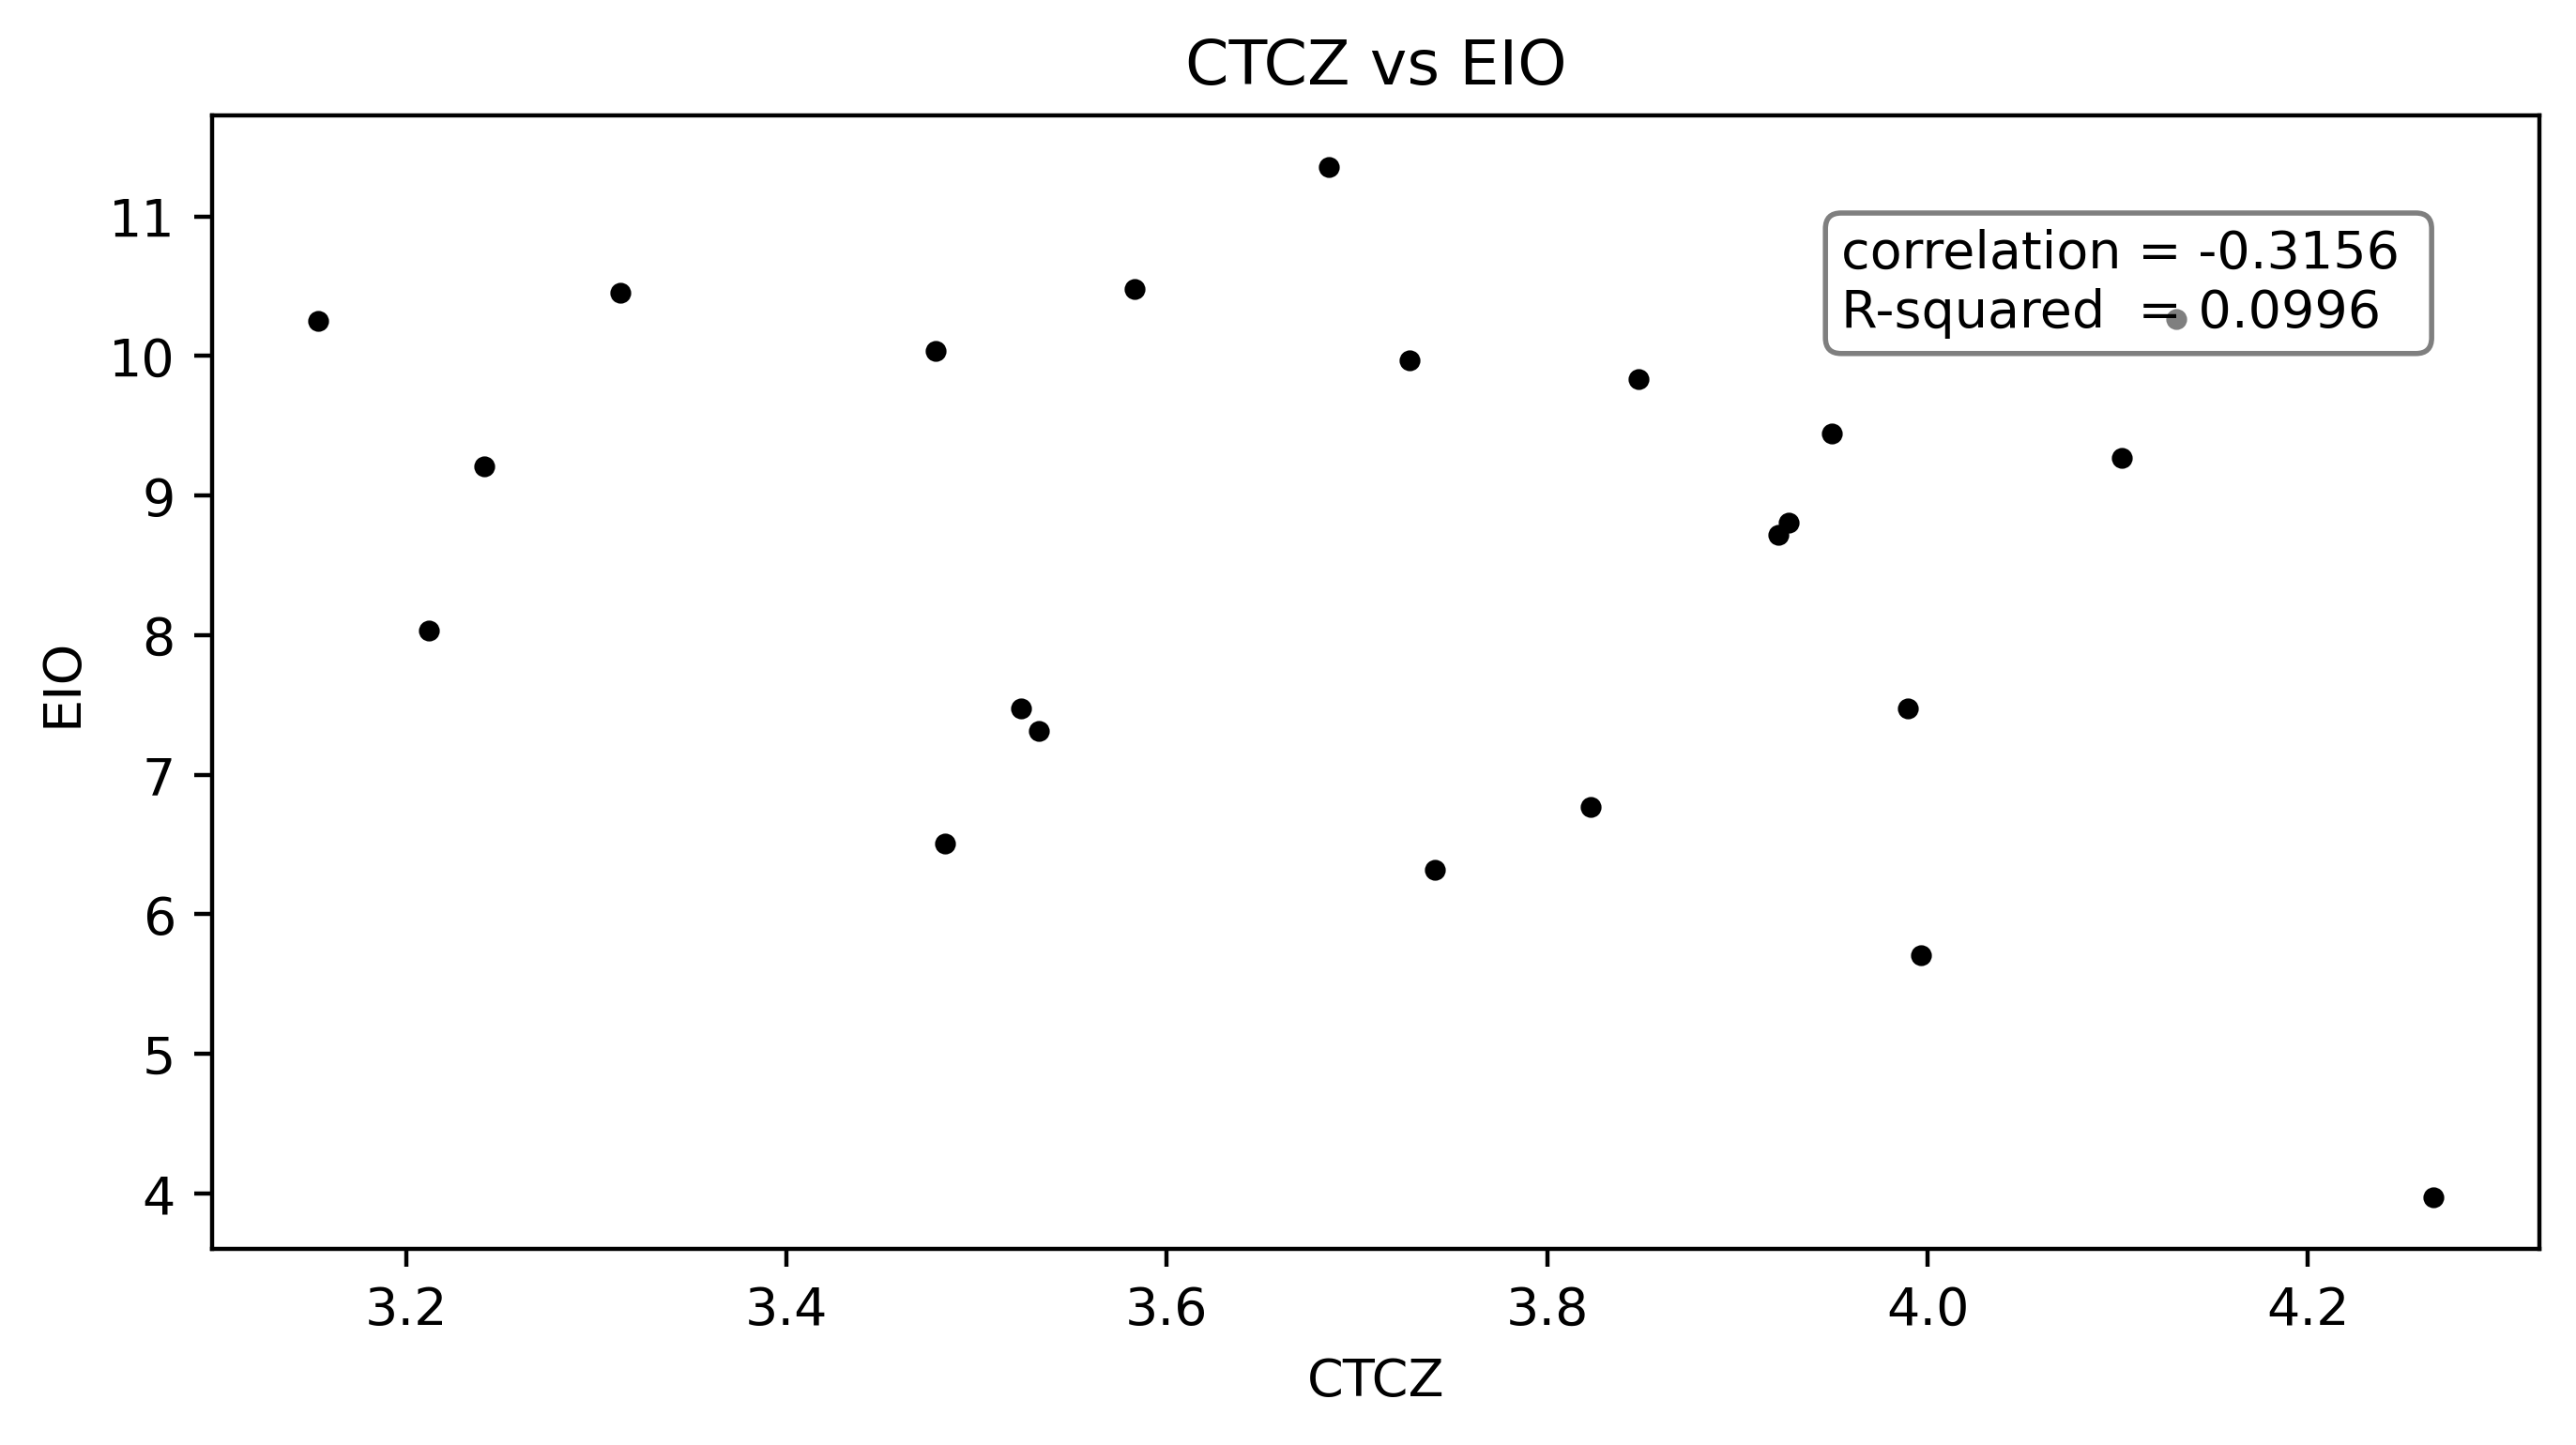

In [139]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs EIO')
ax.plot(ctcz, eio, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('EIO')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = -0.3156 \nR-squared  = 0.0996', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;
plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_eio.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

#### WEIO

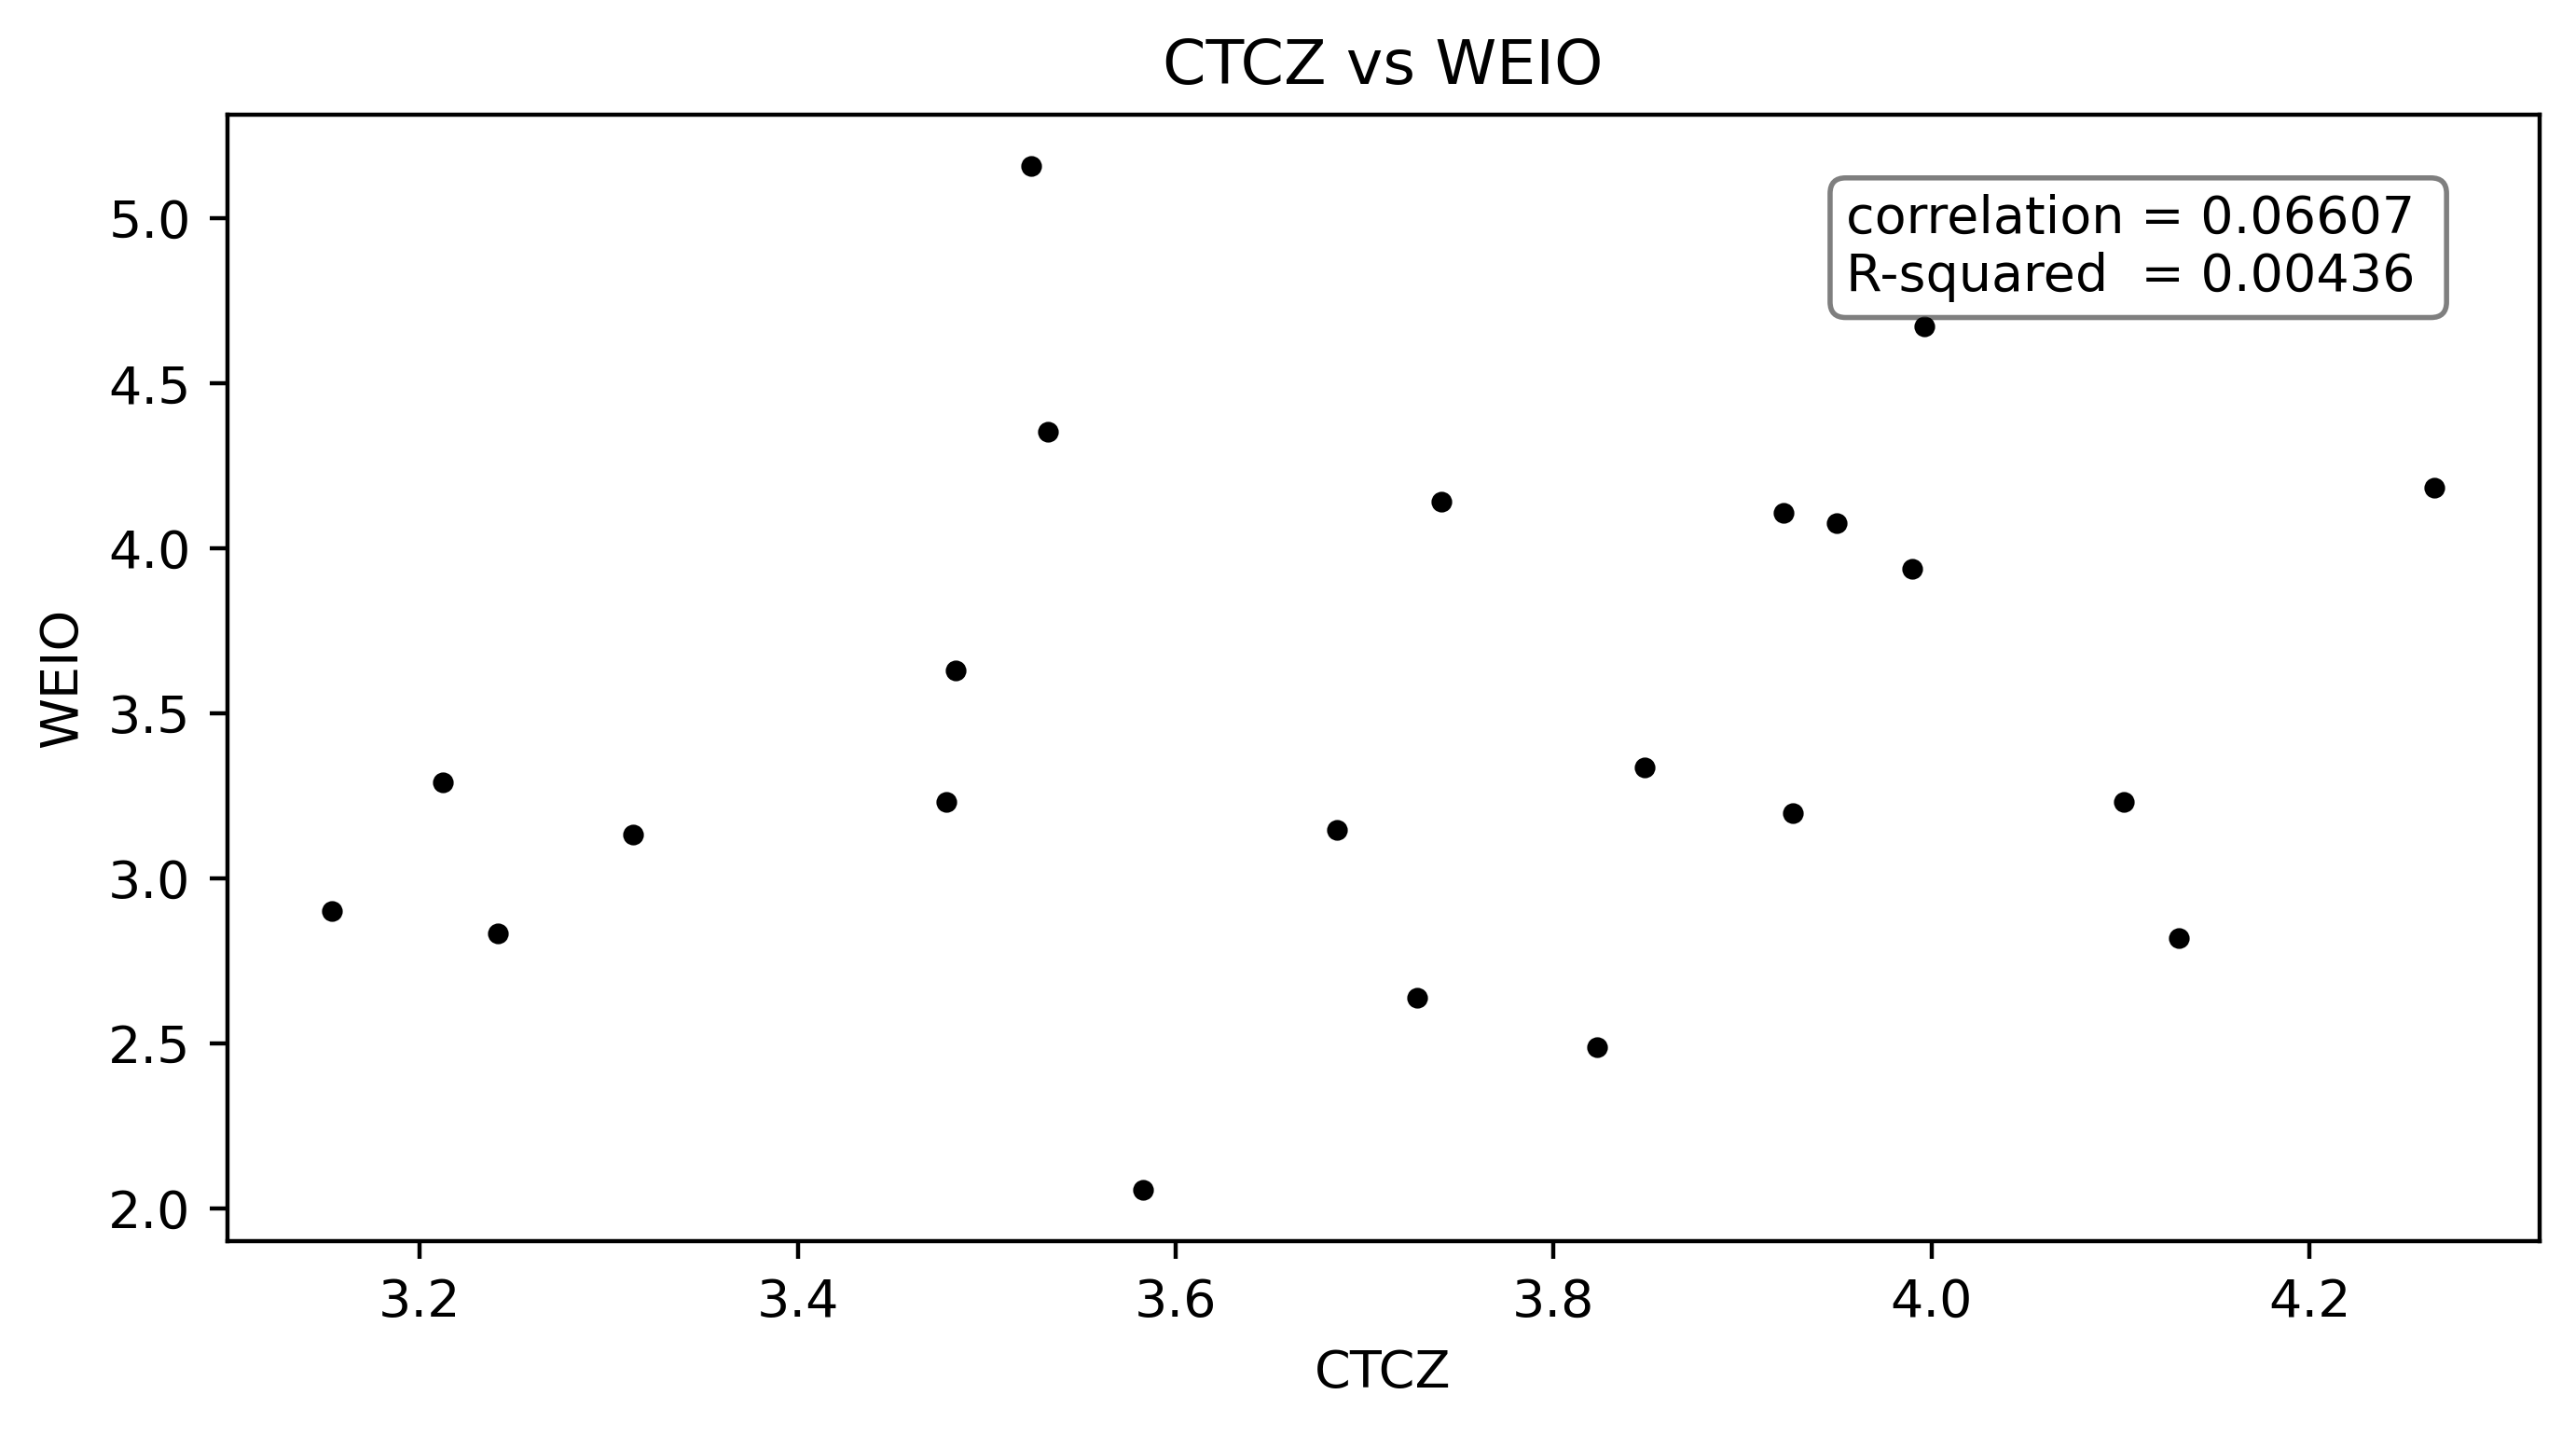

In [140]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs WEIO')
ax.plot(ctcz, weio, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('WEIO')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.93, 'correlation = 0.06607 \nR-squared  = 0.00436', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;

plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_weio.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [109]:
np.corrcoef(ctcz, weio)

array([[1.        , 0.23109821],
       [0.23109821, 1.        ]])

In [70]:
stats.pearsonr(ctcz_mean, weio_mean)

(0.06607537647306792, 0.0008202893144138606)

In [75]:
res = stats.linregress(ctcz_mean, weio_mean)

In [76]:
res.rvalue**2

0.004365955376057656

#### EqIO

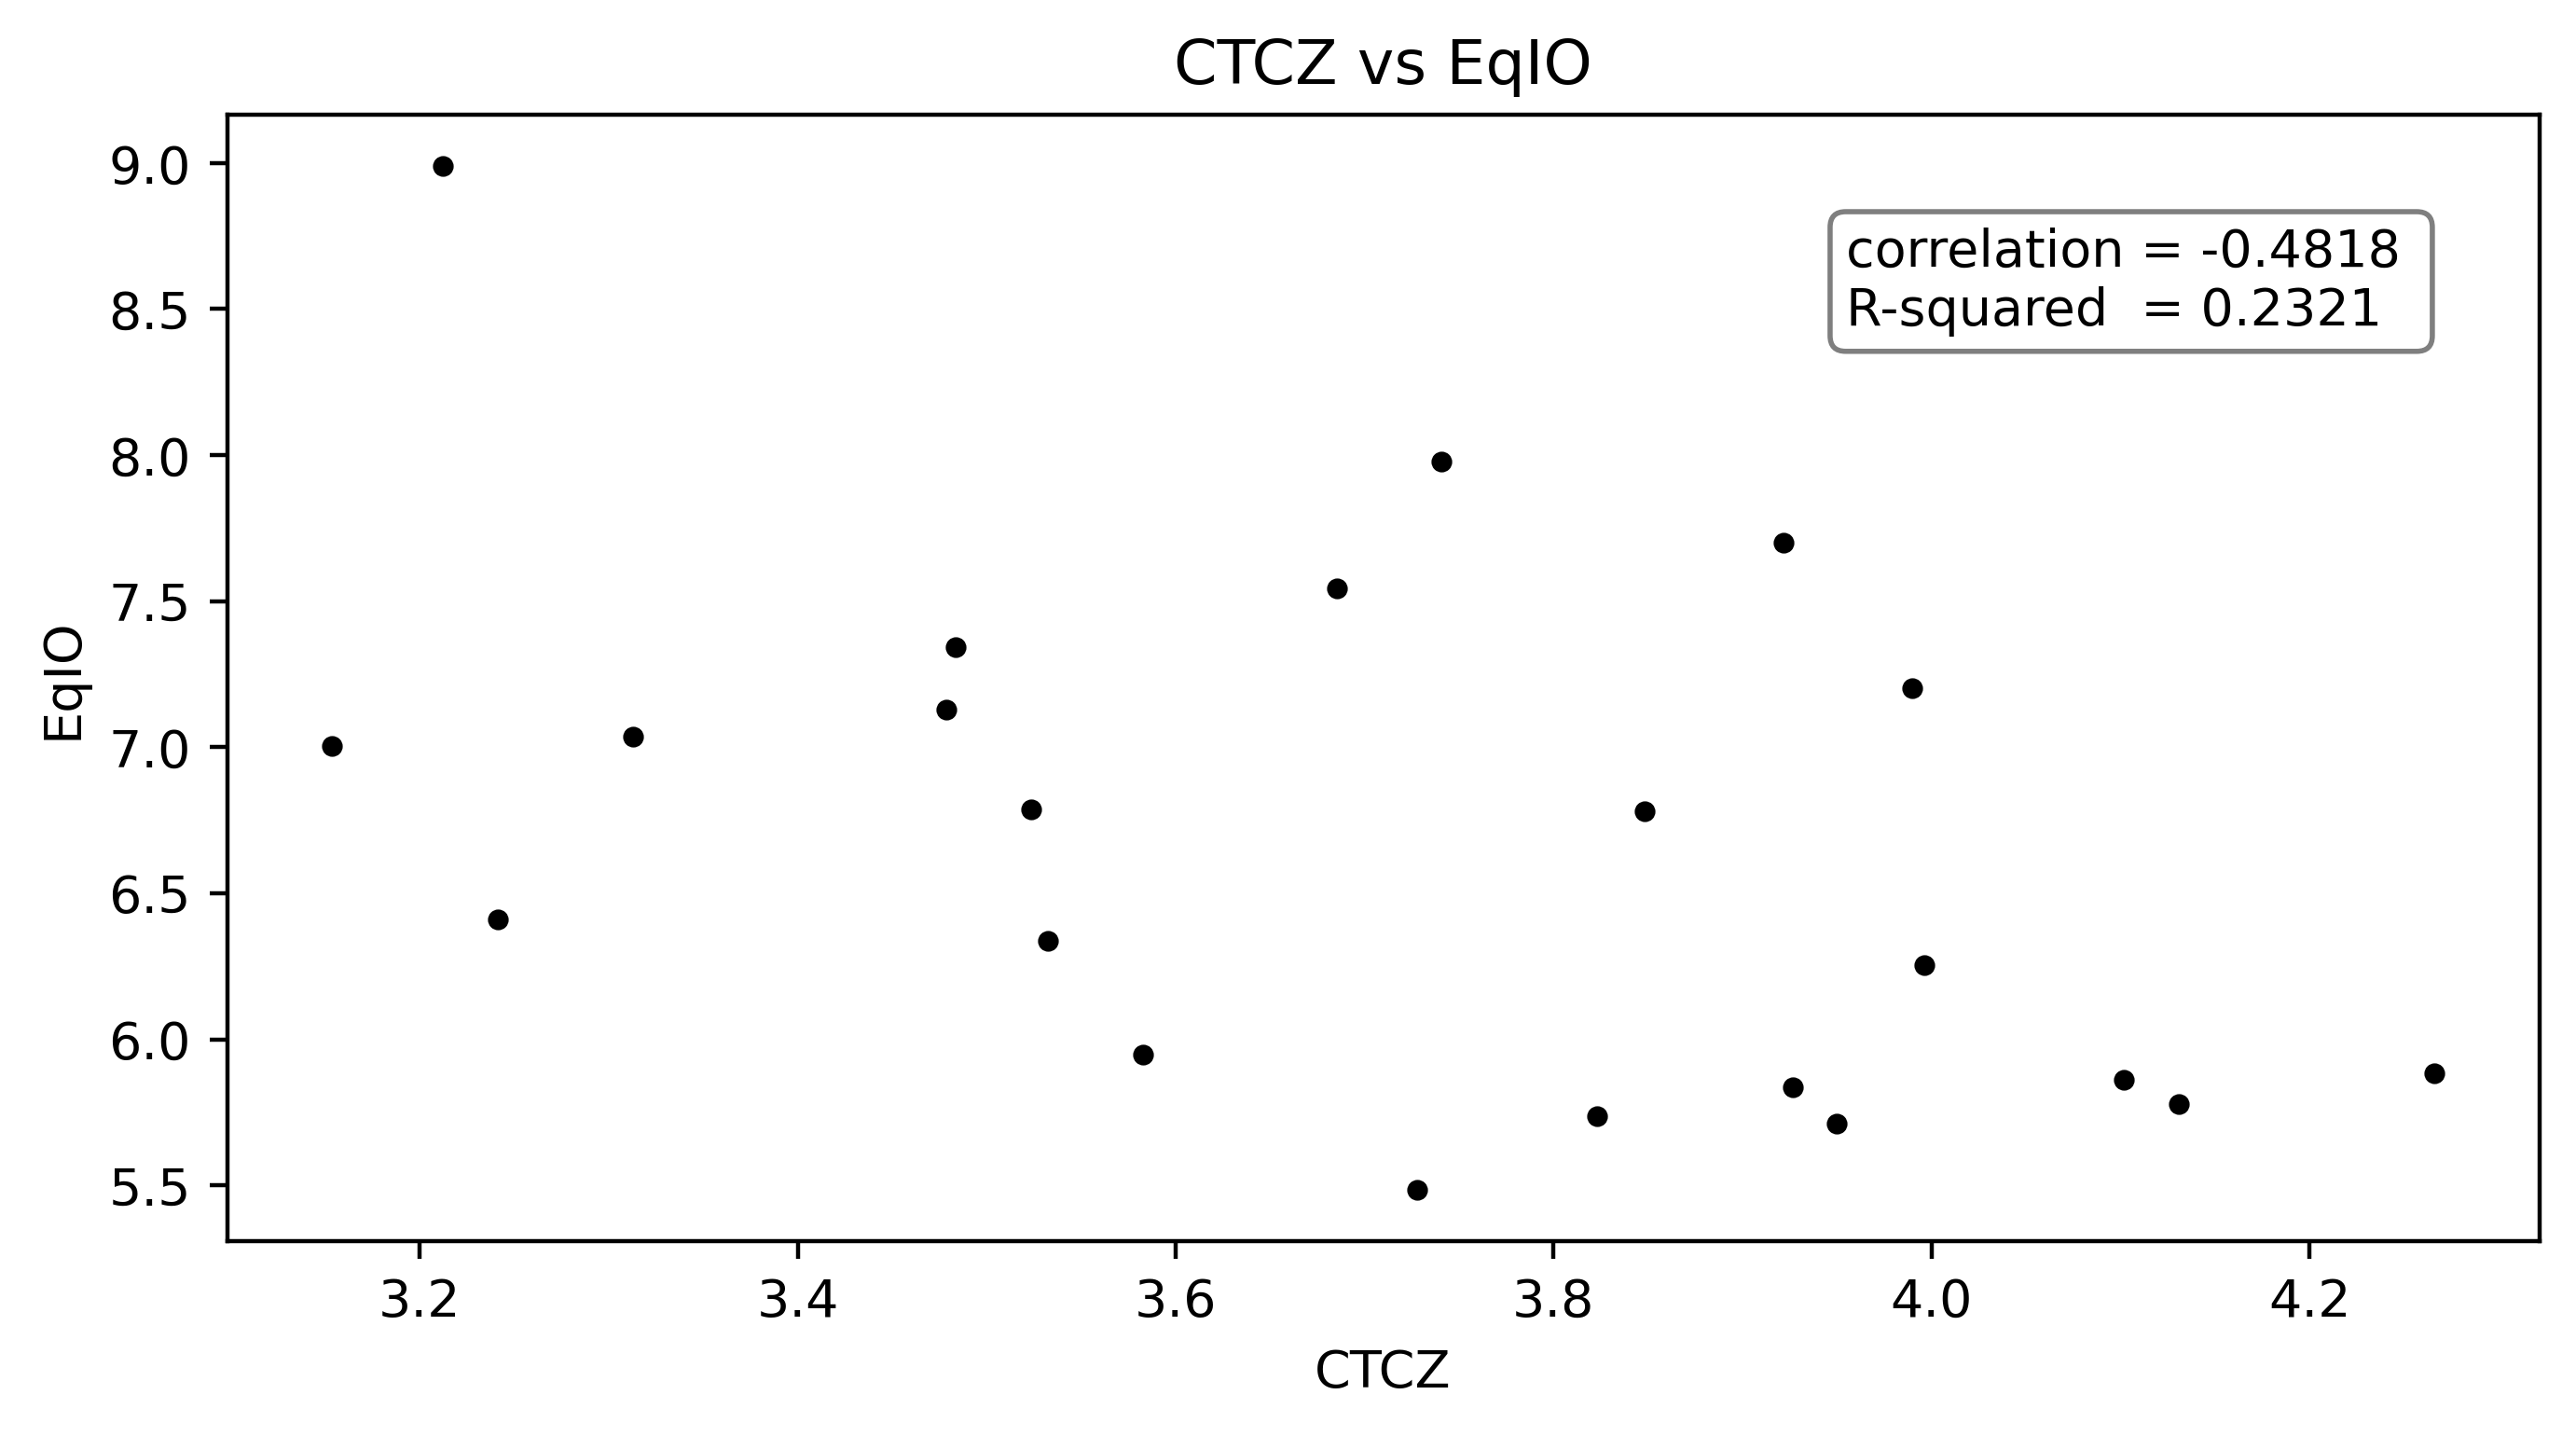

In [143]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs EqIO')
ax.plot(ctcz, eqio, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('EqIO')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = -0.4818 \nR-squared  = 0.2321', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;
plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_eqio.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [78]:
np.corrcoef(ctcz_mean, eqio_mean)

array([[ 1.        , -0.02780131],
       [-0.02780131,  1.        ]])

In [112]:
np.corrcoef(ctcz, eqio)

array([[ 1.        , -0.48182188],
       [-0.48182188,  1.        ]])

In [111]:
stats.pearsonr(ctcz, eqio)

(-0.4818218775570511, 0.02316903001561217)

In [141]:
res = stats.linregress(ctcz, eqio)

In [142]:
res.rvalue**2

0.23215232169260186

#### NINO3.4

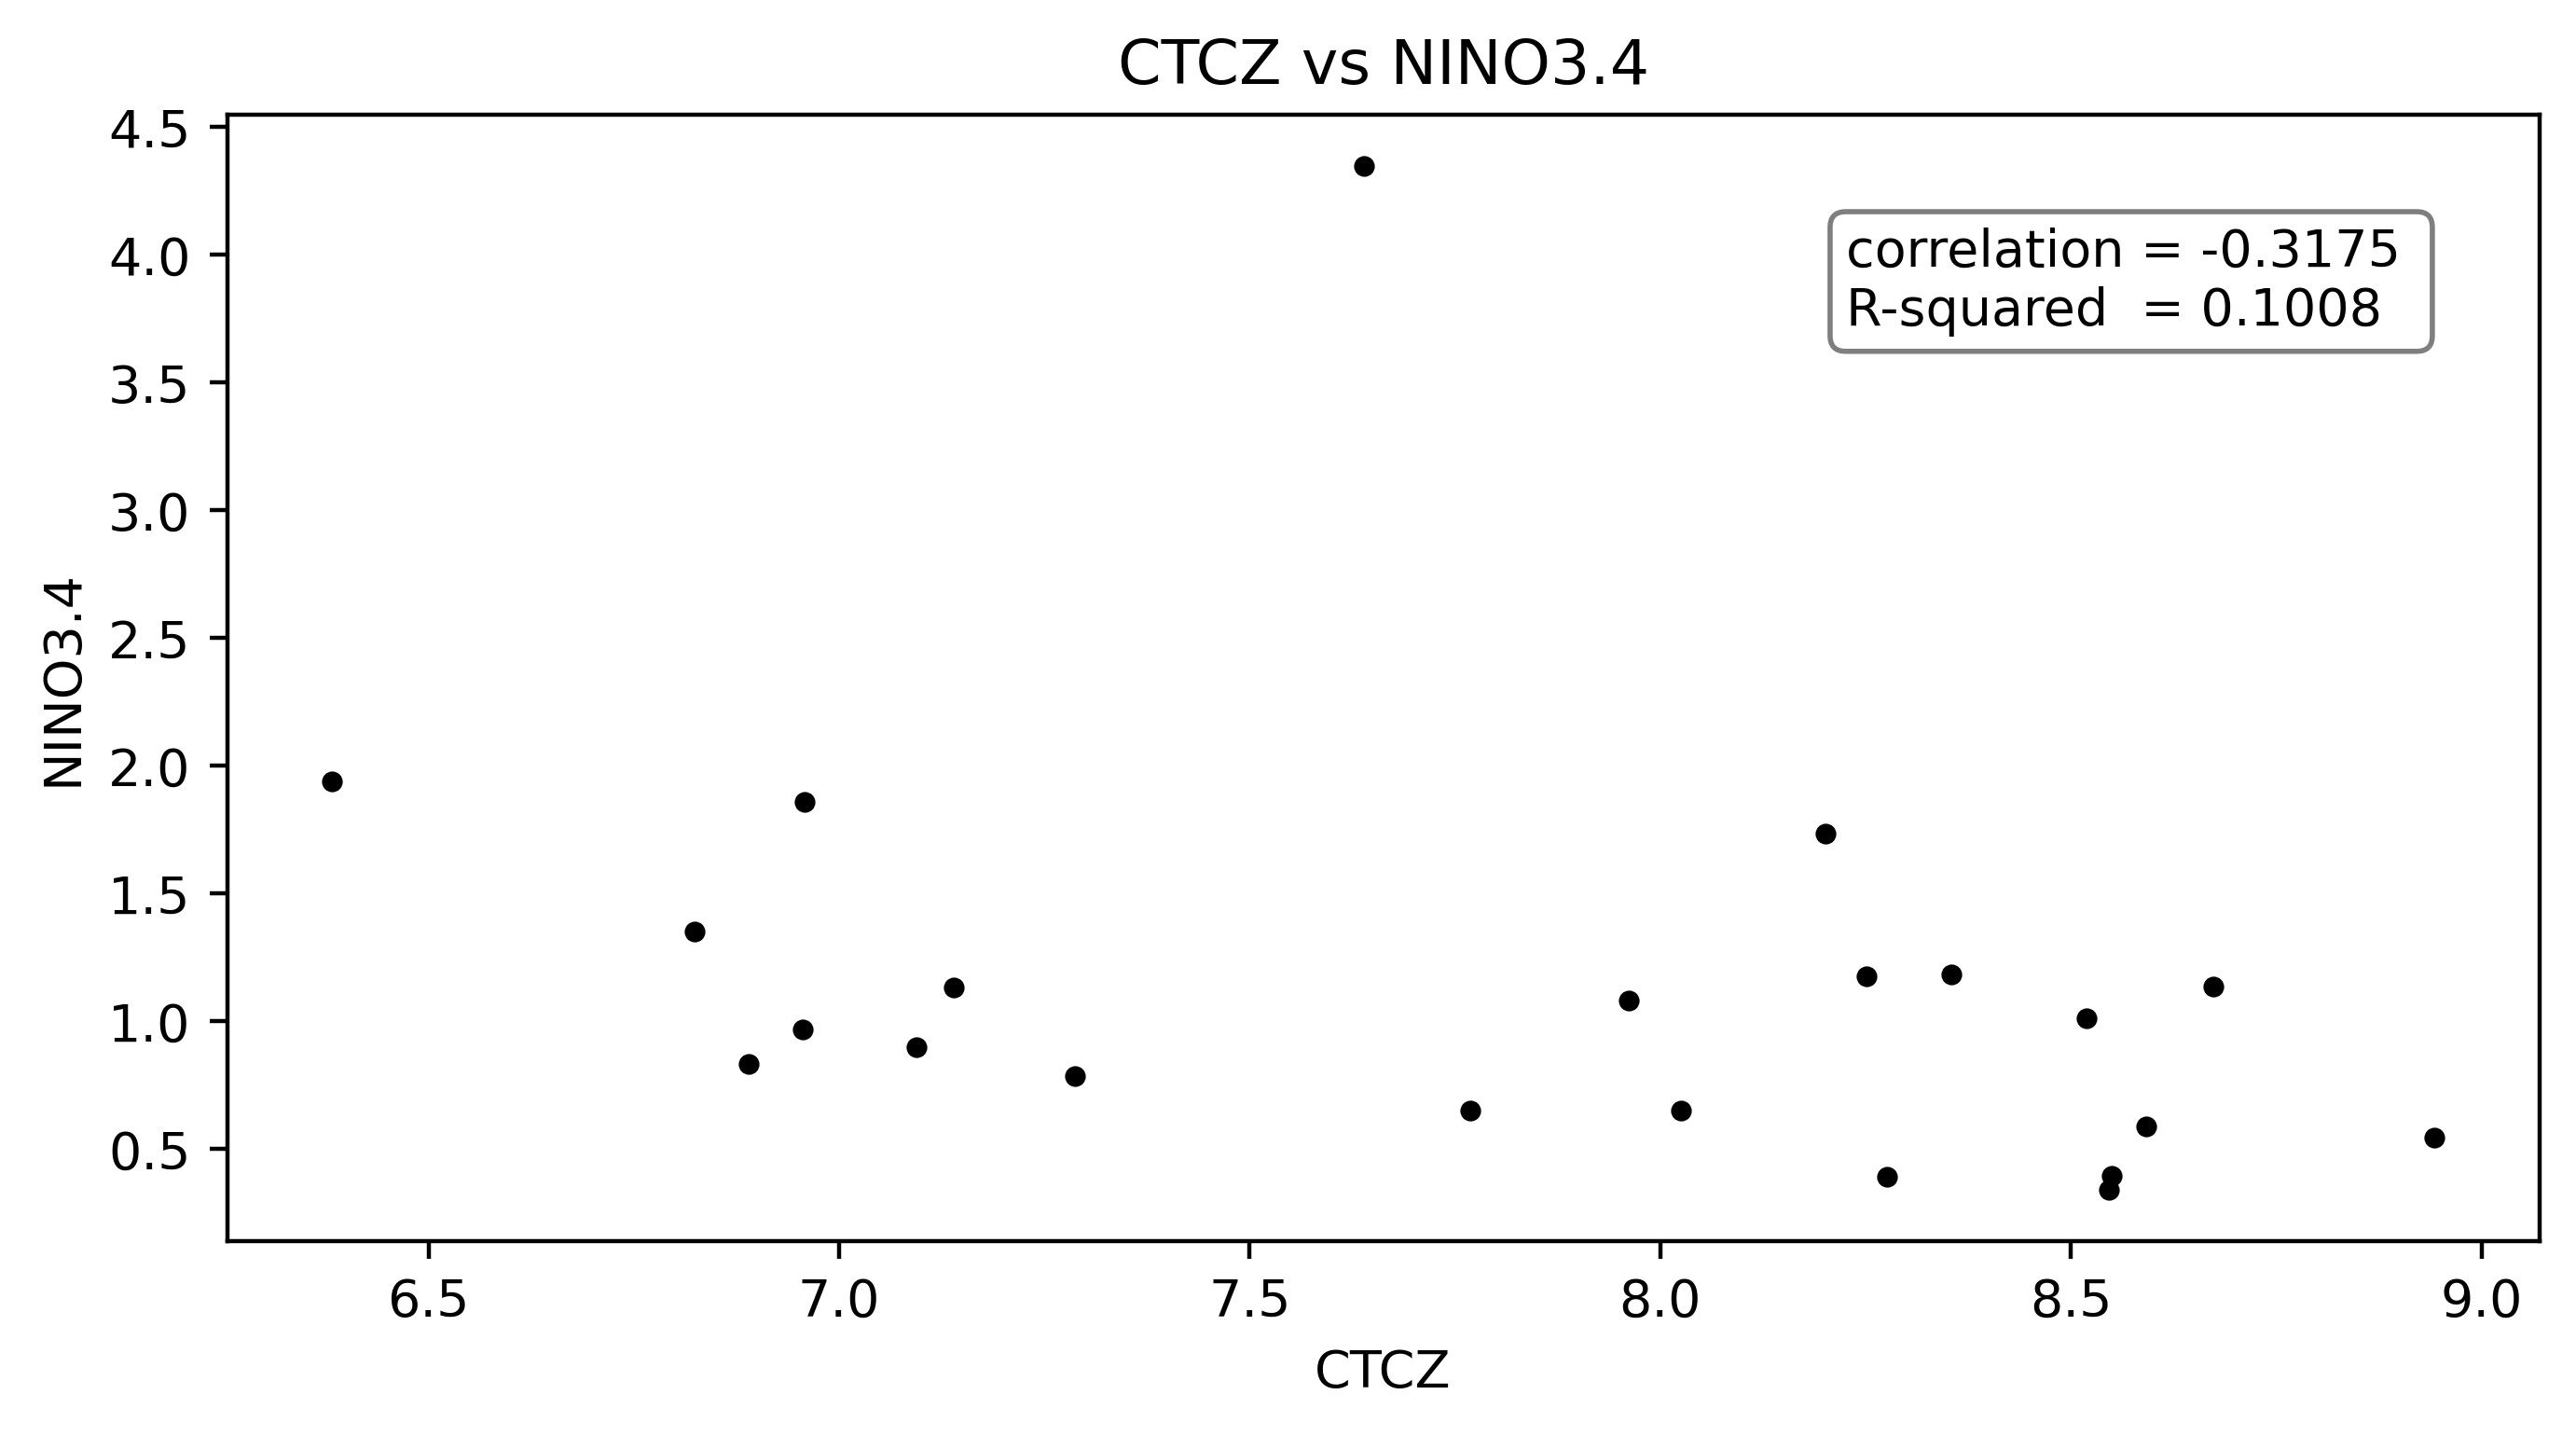

In [36]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs NINO3.4')
ax.plot(ctcz, nino, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('NINO3.4')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.90, 'correlation = -0.3175 \nR-squared  = 0.1008', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;

plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_nino3.4_daily.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [25]:
np.corrcoef(ctcz, nino)

array([[ 1.       , -0.3175083],
       [-0.3175083,  1.       ]])

In [150]:
np.corrcoef(ctcz_mean, nino_mean)

array([[1.        , 0.11675392],
       [0.11675392, 1.        ]])

In [27]:
from scipy import stats

In [28]:
stats.pearsonr(ctcz, nino)

In [34]:
res = stats.linregress(ctcz, nino)

In [35]:
res.rvalue**2

0.10081151875327633